In [62]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/10.4 MB ? eta -:--:--Downloading statsmodels-0.14.5-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl (10.4 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 20.8 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] [statsmodels]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [63]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn import tree as sktree

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

import statsmodels.formula.api as smf


In [6]:
M200 = pd.read_csv("/workspaces/An-Introduction-to-Statistical-Learning-Python/data/Event 7 Men 200 Y Free.csv")
M200["Event"] = "Men 200 Y Free"

In [7]:
M200 = M200[M200["Time"] != "NS"]
M200

,Club,Swimmer,Age Group,Seed Time,HT/LN,Time,Pl,Pts,Event
0,1693,"Bureau, Lucas",30-34,01:37.0,26/5,01:38.3,1.0,11.0,Men 200 Y Free
1,PINE,"Modrov, Drew",35-39,01:39.7,23/5,01:39.0,1.0,11.0,Men 200 Y Free
2,NYAC,"Ipsen, Anton",30-34,01:42.0,26/3,01:39.8,2.0,9.0,Men 200 Y Free
3,TOC,"McQuet, Murphy",25-29,01:40.0,29/5,01:40.2,1.0,11.0,Men 200 Y Free
4,NYAC,"Quinn, Austin",30-34,01:40.0,26/4,01:40.2,3.0,8.0,Men 200 Y Free
...,...,...,...,...,...,...,...,...,...
264,LVM,"Chalkley, James",60-64,03:29.2,9-Aug,03:35.0,30.0,0.0,Men 200 Y Free
265,RMRM,"Burson, William",80-84,03:29.0,10-Feb,03:39.0,4.0,7.0,Men 200 Y Free
266,SNM,"Weaver, Ron",75-79,04:20.0,5-Feb,03:46.4,11.0,0.0,Men 200 Y Free
267,RMRM,"Abrahams, Richard",80-84,02:32.8,8-Feb,04:00.6,5.0,6.0,Men 200 Y Free


In [8]:
M200["Time_sec"] = M200["Time"].apply(lambda t: int(t.split(":")[0]) * 60 + float(t.split(":")[1]) if pd.notna(t) else None)
M200

,Club,Swimmer,Age Group,Seed Time,HT/LN,Time,Pl,Pts,Event,Time_sec
0,1693,"Bureau, Lucas",30-34,01:37.0,26/5,01:38.3,1.0,11.0,Men 200 Y Free,98.3
1,PINE,"Modrov, Drew",35-39,01:39.7,23/5,01:39.0,1.0,11.0,Men 200 Y Free,99.0
2,NYAC,"Ipsen, Anton",30-34,01:42.0,26/3,01:39.8,2.0,9.0,Men 200 Y Free,99.8
3,TOC,"McQuet, Murphy",25-29,01:40.0,29/5,01:40.2,1.0,11.0,Men 200 Y Free,100.2
4,NYAC,"Quinn, Austin",30-34,01:40.0,26/4,01:40.2,3.0,8.0,Men 200 Y Free,100.2
...,...,...,...,...,...,...,...,...,...,...
264,LVM,"Chalkley, James",60-64,03:29.2,9-Aug,03:35.0,30.0,0.0,Men 200 Y Free,215.0
265,RMRM,"Burson, William",80-84,03:29.0,10-Feb,03:39.0,4.0,7.0,Men 200 Y Free,219.0
266,SNM,"Weaver, Ron",75-79,04:20.0,5-Feb,03:46.4,11.0,0.0,Men 200 Y Free,226.4
267,RMRM,"Abrahams, Richard",80-84,02:32.8,8-Feb,04:00.6,5.0,6.0,Men 200 Y Free,240.6


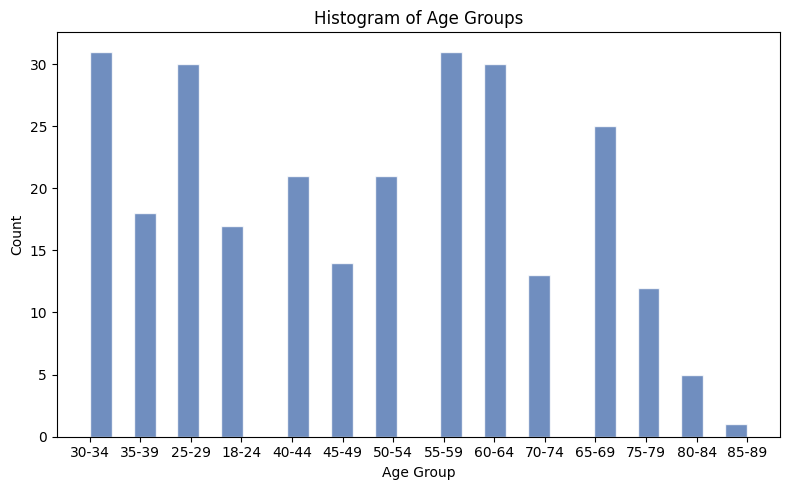

In [9]:
plt.figure(figsize=(8, 5))
plt.hist(M200["Age Group"], bins=30, color="#4C72B0", edgecolor="white", alpha=0.8)
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Histogram of Age Groups")
plt.tight_layout()
plt.show()

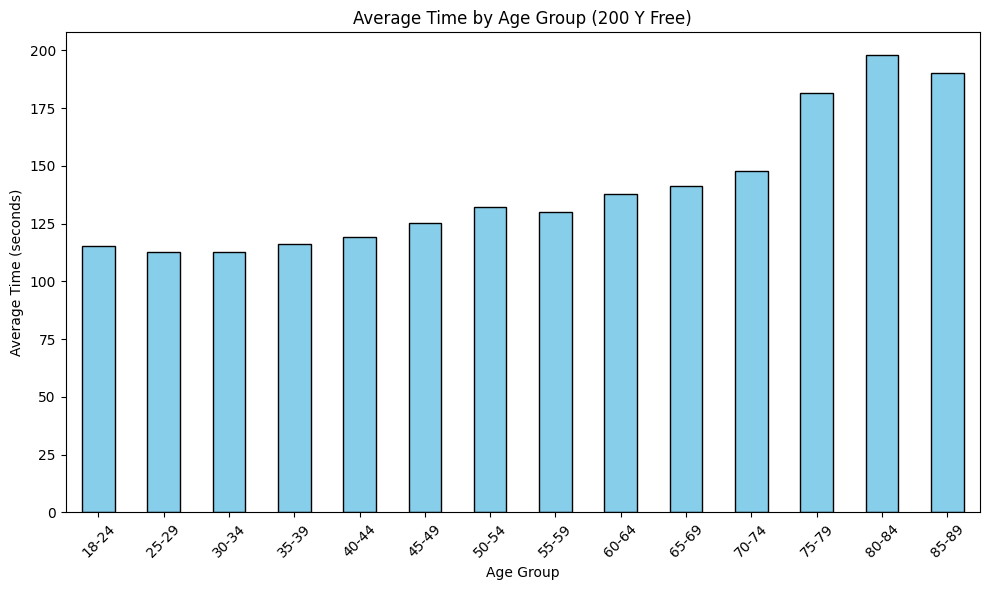

In [10]:
# Group by Age Group and calculate average time
grouped = M200.groupby("Age Group")["Time_sec"].mean().sort_index()

# Plot
plt.figure(figsize=(10, 6))
grouped.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Age Group")
plt.ylabel("Average Time (seconds)")
plt.title("Average Time by Age Group (200 Y Free)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
g = M200.groupby("Age Group")["Time_sec"]
summary = g.agg(mean="mean", median="median", std="std", n="count").reset_index()
summary["pace_per_100y"] = summary["mean"] / 2  # since race is 200y
summary

,Age Group,mean,median,std,n,pace_per_100y
0,18-24,115.182353,112.80,7.205053,17,57.591176
1,25-29,112.810000,111.00,8.622159,30,56.405000
2,30-34,112.874194,107.60,11.230671,31,56.437097
3,35-39,116.122222,116.75,10.293548,18,58.061111
4,40-44,119.333333,116.70,9.926446,21,59.666667
5,45-49,125.092857,123.25,12.314811,14,62.546429
6,50-54,132.042857,128.50,14.923491,21,66.021429
7,55-59,129.983871,126.90,14.940306,31,64.991935
8,60-64,138.000000,134.55,20.352802,30,69.000000
9,65-69,141.284000,141.40,12.543680,25,70.642000


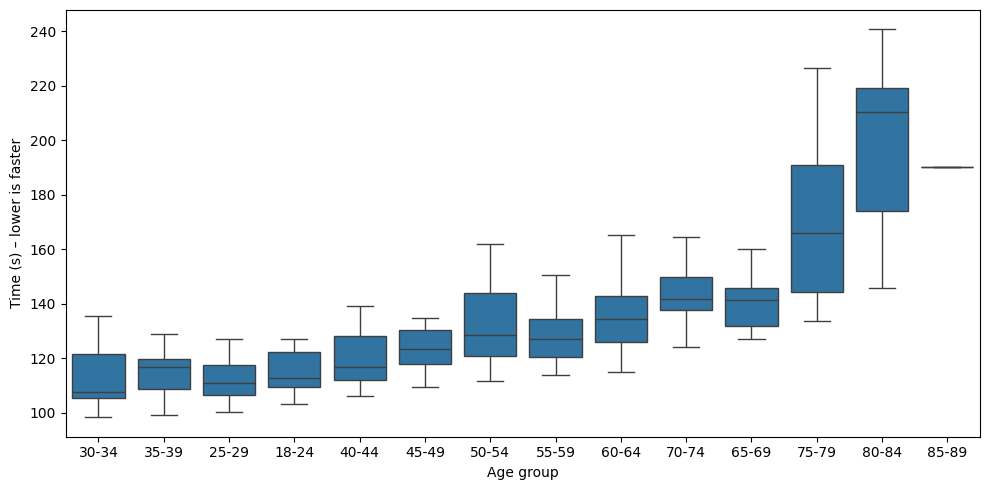

In [12]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(x="Age Group", y="Time_sec", data=M200, showfliers=False)
counts = M200["Age Group"].value_counts().reindex([*summary["Age Group"]]).values
#for i,(x,c) in enumerate(zip(summary["Age Group"], counts)):
#    ax.text(i, ax.get_ylim()[0]-5, f"n={c}", ha="center", va="top", fontsize=9)
plt.ylabel("Time (s) – lower is faster")
plt.xlabel("Age group")
plt.tight_layout()
plt.show()

In [13]:
M200Free = pd.read_csv("/workspaces/An-Introduction-to-Statistical-Learning-Python/data/Event 7 Men 200 Y Free.csv")
M200Free["Event"] = "Men 200 Y Free"

M100Fly = pd.read_csv("/workspaces/An-Introduction-to-Statistical-Learning-Python/data/Event 13 Men 100 Y Fly.csv")
M100Fly["Event"] = "Men 100 Y Fly"

M100Back = pd.read_csv("/workspaces/An-Introduction-to-Statistical-Learning-Python/data/Event 15 Men 100 Y Back.csv")
M100Back["Event"] = "Men 100 Y Back"

M50Breast = pd.read_csv("/workspaces/An-Introduction-to-Statistical-Learning-Python/data/Event 17 Men 50 Y Breast.csv")
M50Breast["Event"] = "Men 50 Y Breast"

M400IM = pd.read_csv("/workspaces/An-Introduction-to-Statistical-Learning-Python/data/Event 17 Men 400 Y IM.csv")
M400IM["Event"] = "Men 400 Y IM"

M200Back = pd.read_csv("/workspaces/An-Introduction-to-Statistical-Learning-Python/data/Event 21 Men 200 Y Back.csv")
M200Back["Event"] = "Men 200 Y Back"

M100IM = pd.read_csv("/workspaces/An-Introduction-to-Statistical-Learning-Python/data/Event 23 Men 100 Y IM.csv")
M100IM["Event"] = "Men 100 Y IM"

M200Fly = pd.read_csv("/workspaces/An-Introduction-to-Statistical-Learning-Python/data/Event 25 Men 200 Y Fly.csv")
M200Fly["Event"] = "Men 200 Y Fly"

M50Free = pd.read_csv("/workspaces/An-Introduction-to-Statistical-Learning-Python/data/Event 27 Men 50 Y Free.csv")
M50Free["Event"] = "Men 50 Y Free"

M100Breast = pd.read_csv("/workspaces/An-Introduction-to-Statistical-Learning-Python/data/Event 29 Men 100 Y Breast.csv")
M100Breast["Event"] = "Men 100 Y Breast"

M200Breast = pd.read_csv("/workspaces/An-Introduction-to-Statistical-Learning-Python/data/Event 35 Men 200 Y Breast.csv")
M200Breast["Event"] = "Men 200 Y Breast"

M100Free = pd.read_csv("/workspaces/An-Introduction-to-Statistical-Learning-Python/data/Event 37 Men 100 Y Free.csv")
M100Free["Event"] = "Men 100 Y Free"

M50Back = pd.read_csv("/workspaces/An-Introduction-to-Statistical-Learning-Python/data/Event 39 Men 50 Y Back.csv")
M50Back["Event"] = "Men 50 Y Back"

M200IM = pd.read_csv("/workspaces/An-Introduction-to-Statistical-Learning-Python/data/Event 41 Men 200 Y IM.csv")
M200IM["Event"] = "Men 200 Y IM"

M50Fly = pd.read_csv("/workspaces/An-Introduction-to-Statistical-Learning-Python/data/Event 43 Men 50 Y Fly.csv")
M50Fly["Event"] = "Men 50 Y Fly"


In [14]:
Men_data = pd.concat([M200Free, M100Free, M100Back, M50Breast, M400IM, M200Back, M100IM, M200Fly, M50Free, M100Breast, M200Breast, M100Free, M50Back, M200IM, M50Fly])
Men_data

,Club,Swimmer,Age Group,Seed Time,HT/LN,Time,Pl,Pts,Event,Age \t\t\t\t\t\t\t\t\t\t\t\t\tGroup,Seed \t\t\t\t\t\t\t\t\t\t\t\t\t \t\t\t\t\t\t\t\t\t\t\t\t\t\tTime
0,1693,"Bureau, Lucas",30-34,01:37.0,26/5,01:38.3,1.0,11.0,Men 200 Y Free,NaN,NaN
1,PINE,"Modrov, Drew",35-39,01:39.7,23/5,01:39.0,1.0,11.0,Men 200 Y Free,NaN,NaN
2,NYAC,"Ipsen, Anton",30-34,01:42.0,26/3,01:39.8,2.0,9.0,Men 200 Y Free,NaN,NaN
3,TOC,"McQuet, Murphy",25-29,01:40.0,29/5,01:40.2,1.0,11.0,Men 200 Y Free,NaN,NaN
4,NYAC,"Quinn, Austin",30-34,01:40.0,26/4,01:40.2,3.0,8.0,Men 200 Y Free,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
346,TXLA,"Stinchcombe, Maxwell",NaN,NaN,6/2,NS,NaN,0.0,Men 50 Y Fly,65-69,32.0
347,TXLA,"Storvik, Chuck",NaN,NaN,6/10,NS,NaN,0.0,Men 50 Y Fly,65-69,32.09
348,MOVY,"Thompson, Anthony",NaN,NaN,9/10,NS,NaN,0.0,Men 50 Y Fly,60-64,29.73
349,RMRM,"White, Brad",NaN,NaN,11/4,NS,NaN,0.0,Men 50 Y Fly,55-59,31.41


In [18]:
# Show unique events and their counts
Men_data['Event'].value_counts().shape[0]

14

In [19]:
Men_data = Men_data.rename(columns={"Age \t\t\t\t\t\t\t\t\t\t\t\t\tGroup": "Age_Group"})
Men_data = Men_data.rename(columns={"Seed \t\t\t\t\t\t\t\t\t\t\t\t\t \t\t\t\t\t\t\t\t\t\t\t\t\t\tTime": "Seed_Time"})
Men_data

,Club,Swimmer,Age Group,Seed Time,HT/LN,Time,Pl,Pts,Event,Age_Group,Seed_Time
0,1693,"Bureau, Lucas",30-34,01:37.0,26/5,01:38.3,1.0,11.0,Men 200 Y Free,NaN,NaN
1,PINE,"Modrov, Drew",35-39,01:39.7,23/5,01:39.0,1.0,11.0,Men 200 Y Free,NaN,NaN
2,NYAC,"Ipsen, Anton",30-34,01:42.0,26/3,01:39.8,2.0,9.0,Men 200 Y Free,NaN,NaN
3,TOC,"McQuet, Murphy",25-29,01:40.0,29/5,01:40.2,1.0,11.0,Men 200 Y Free,NaN,NaN
4,NYAC,"Quinn, Austin",30-34,01:40.0,26/4,01:40.2,3.0,8.0,Men 200 Y Free,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
346,TXLA,"Stinchcombe, Maxwell",NaN,NaN,6/2,NS,NaN,0.0,Men 50 Y Fly,65-69,32.0
347,TXLA,"Storvik, Chuck",NaN,NaN,6/10,NS,NaN,0.0,Men 50 Y Fly,65-69,32.09
348,MOVY,"Thompson, Anthony",NaN,NaN,9/10,NS,NaN,0.0,Men 50 Y Fly,60-64,29.73
349,RMRM,"White, Brad",NaN,NaN,11/4,NS,NaN,0.0,Men 50 Y Fly,55-59,31.41


In [20]:
NS_count = (Men_data["Time"] == "NS").sum()
print(f'Number of rows with No Time: {NS_count}')

Number of rows with No Time: 443


In [21]:
Men_data = Men_data[Men_data["Time"] != "NS"]
Men_data

,Club,Swimmer,Age Group,Seed Time,HT/LN,Time,Pl,Pts,Event,Age_Group,Seed_Time
0,1693,"Bureau, Lucas",30-34,01:37.0,26/5,01:38.3,1.0,11.0,Men 200 Y Free,NaN,NaN
1,PINE,"Modrov, Drew",35-39,01:39.7,23/5,01:39.0,1.0,11.0,Men 200 Y Free,NaN,NaN
2,NYAC,"Ipsen, Anton",30-34,01:42.0,26/3,01:39.8,2.0,9.0,Men 200 Y Free,NaN,NaN
3,TOC,"McQuet, Murphy",25-29,01:40.0,29/5,01:40.2,1.0,11.0,Men 200 Y Free,NaN,NaN
4,NYAC,"Quinn, Austin",30-34,01:40.0,26/4,01:40.2,3.0,8.0,Men 200 Y Free,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
304,SDSM,"Williams, Frank",NaN,NaN,1/6,43.50,1.0,11.0,Men 50 Y Fly,85-89,51.5
305,MINN,"Solberg, Norman",NaN,NaN,1/5,46.56,2.0,9.0,Men 50 Y Fly,85-89,48.67
306,IM,"Schein, Howard",NaN,NaN,2/7,46.71,3.0,8.0,Men 50 Y Fly,80-84,46.47
307,FAFC,"Allums Jr, Bobby",NaN,NaN,31/3,DQ,NaN,0.0,Men 50 Y Fly,18-24,26.5


In [22]:
Men_data["Age Group"].isna().sum()

np.int64(3649)

In [23]:
Men_data["Age_Group"].isna().sum()

np.int64(423)

In [24]:
Men_data[['Age Group', 'Age_Group']]

,Age Group,Age_Group
0,30-34,NaN
1,35-39,NaN
2,30-34,NaN
3,25-29,NaN
4,30-34,NaN
...,...,...
304,NaN,85-89
305,NaN,85-89
306,NaN,80-84
307,NaN,18-24


In [25]:
# Fill missing Age_Group values with Age Group if available
if 'Age Group' in Men_data.columns and 'Age_Group' in Men_data.columns:
    Men_data['Age_Group'] = Men_data['Age_Group'].combine_first(Men_data['Age Group'])
    Men_data = Men_data.drop(columns=['Age Group'])
Men_data["Age_Group"].isna().sum()

/tmp/ipykernel_118381/1376871559.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Men_data['Age_Group'] = Men_data['Age_Group'].combine_first(Men_data['Age Group'])


np.int64(154)

In [26]:
# Fill missing Age_Group values with Age Group if available
if 'Seed_Time' in Men_data.columns and 'Seed Time' in Men_data.columns:
    Men_data['Seed_Time'] = Men_data['Seed_Time'].combine_first(Men_data['Seed Time'])
    Men_data = Men_data.drop(columns=['Seed Time'])

Men_data["Seed_Time"].isna().sum() # Its ok if we don't have Seed Time

np.int64(154)

In [27]:
missing_age_group_rows = Men_data[Men_data["Age_Group"].isna()]
missing_age_group_rows

,Club,Swimmer,HT/LN,Time,Pl,Pts,Event,Age_Group,Seed_Time
134,NaN,NaN,NaN,NaN,NaN,NaN,Men 400 Y IM,NaN,NaN
135,NaN,NaN,NaN,NaN,NaN,NaN,Men 400 Y IM,NaN,NaN
136,NaN,NaN,NaN,NaN,NaN,NaN,Men 400 Y IM,NaN,NaN
137,NaN,NaN,NaN,NaN,NaN,NaN,Men 400 Y IM,NaN,NaN
138,NaN,NaN,NaN,NaN,NaN,NaN,Men 400 Y IM,NaN,NaN
...,...,...,...,...,...,...,...,...,...
283,NaN,NaN,NaN,NaN,NaN,NaN,Men 400 Y IM,NaN,NaN
284,NaN,NaN,NaN,NaN,NaN,NaN,Men 400 Y IM,NaN,NaN
285,NaN,NaN,NaN,NaN,NaN,NaN,Men 400 Y IM,NaN,NaN
286,NaN,NaN,NaN,NaN,NaN,NaN,Men 400 Y IM,NaN,NaN


In [28]:
missing_swimmer = Men_data[Men_data["Swimmer"].isna()]
missing_swimmer

,Club,Swimmer,HT/LN,Time,Pl,Pts,Event,Age_Group,Seed_Time
134,NaN,NaN,NaN,NaN,NaN,NaN,Men 400 Y IM,NaN,NaN
135,NaN,NaN,NaN,NaN,NaN,NaN,Men 400 Y IM,NaN,NaN
136,NaN,NaN,NaN,NaN,NaN,NaN,Men 400 Y IM,NaN,NaN
137,NaN,NaN,NaN,NaN,NaN,NaN,Men 400 Y IM,NaN,NaN
138,NaN,NaN,NaN,NaN,NaN,NaN,Men 400 Y IM,NaN,NaN
...,...,...,...,...,...,...,...,...,...
283,NaN,NaN,NaN,NaN,NaN,NaN,Men 400 Y IM,NaN,NaN
284,NaN,NaN,NaN,NaN,NaN,NaN,Men 400 Y IM,NaN,NaN
285,NaN,NaN,NaN,NaN,NaN,NaN,Men 400 Y IM,NaN,NaN
286,NaN,NaN,NaN,NaN,NaN,NaN,Men 400 Y IM,NaN,NaN


In [30]:
Men_data = Men_data[Men_data["Swimmer"].notna()]
Men_data

,Club,Swimmer,HT/LN,Time,Pl,Pts,Event,Age_Group,Seed_Time
0,1693,"Bureau, Lucas",26/5,01:38.3,1.0,11.0,Men 200 Y Free,30-34,01:37.0
1,PINE,"Modrov, Drew",23/5,01:39.0,1.0,11.0,Men 200 Y Free,35-39,01:39.7
2,NYAC,"Ipsen, Anton",26/3,01:39.8,2.0,9.0,Men 200 Y Free,30-34,01:42.0
3,TOC,"McQuet, Murphy",29/5,01:40.2,1.0,11.0,Men 200 Y Free,25-29,01:40.0
4,NYAC,"Quinn, Austin",26/4,01:40.2,3.0,8.0,Men 200 Y Free,30-34,01:40.0
...,...,...,...,...,...,...,...,...,...
304,SDSM,"Williams, Frank",1/6,43.50,1.0,11.0,Men 50 Y Fly,85-89,51.5
305,MINN,"Solberg, Norman",1/5,46.56,2.0,9.0,Men 50 Y Fly,85-89,48.67
306,IM,"Schein, Howard",2/7,46.71,3.0,8.0,Men 50 Y Fly,80-84,46.47
307,FAFC,"Allums Jr, Bobby",31/3,DQ,NaN,0.0,Men 50 Y Fly,18-24,26.5


In [31]:
# Create a unique swimmer ID based on Club, Swimmer, and Age_Group
Men_data['Swimmer_ID'] = (Men_data['Club'].astype(str) + '_' + Men_data['Swimmer'].astype(str) + '_' + Men_data['Age_Group'].astype(str)).astype('category').cat.codes
Men_data

,Club,Swimmer,HT/LN,Time,Pl,Pts,Event,Age_Group,Seed_Time,Swimmer_ID
0,1693,"Bureau, Lucas",26/5,01:38.3,1.0,11.0,Men 200 Y Free,30-34,01:37.0,6
1,PINE,"Modrov, Drew",23/5,01:39.0,1.0,11.0,Men 200 Y Free,35-39,01:39.7,545
2,NYAC,"Ipsen, Anton",26/3,01:39.8,2.0,9.0,Men 200 Y Free,30-34,01:42.0,477
3,TOC,"McQuet, Murphy",29/5,01:40.2,1.0,11.0,Men 200 Y Free,25-29,01:40.0,751
4,NYAC,"Quinn, Austin",26/4,01:40.2,3.0,8.0,Men 200 Y Free,30-34,01:40.0,486
...,...,...,...,...,...,...,...,...,...,...
304,SDSM,"Williams, Frank",1/6,43.50,1.0,11.0,Men 50 Y Fly,85-89,51.5,650
305,MINN,"Solberg, Norman",1/5,46.56,2.0,9.0,Men 50 Y Fly,85-89,48.67,330
306,IM,"Schein, Howard",2/7,46.71,3.0,8.0,Men 50 Y Fly,80-84,46.47,198
307,FAFC,"Allums Jr, Bobby",31/3,DQ,NaN,0.0,Men 50 Y Fly,18-24,26.5,135


In [39]:
clubs = pd.read_csv("/workspaces/An-Introduction-to-Statistical-Learning-Python/data/clubsTable.csv")
clubs = clubs.rename(columns={"Abbr": "Club"})
clubs = clubs[['Club', 'Name']]
clubs

,Club,Name
0,ATMS,About Time Maste
1,PAOK,AC PAOK
2,ABM,Academy Bullets
3,ADMS,Adirondack Maste
4,AGUA,AGUA Masters
...,...,...
322,CBRY,YMCA Of Bucks &
323,DSMY,YMCA of Greater
324,YM,Yonkers Masters
325,YYMS,York YMCA


In [40]:
Men_data = pd.merge(
    Men_data,
    clubs,
    left_on="Club",
    right_on="Club",
    how="left"
)

In [41]:
Men_data

,Club,Swimmer,HT/LN,Time,Pl,Pts,Event,Age_Group,Seed_Time,Swimmer_ID,Name
0,1693,"Bureau, Lucas",26/5,01:38.3,1.0,11.0,Men 200 Y Free,30-34,01:37.0,6,Club Tribe
1,PINE,"Modrov, Drew",23/5,01:39.0,1.0,11.0,Men 200 Y Free,35-39,01:39.7,545,NaN
2,NYAC,"Ipsen, Anton",26/3,01:39.8,2.0,9.0,Men 200 Y Free,30-34,01:42.0,477,New York Athleti
3,TOC,"McQuet, Murphy",29/5,01:40.2,1.0,11.0,Men 200 Y Free,25-29,01:40.0,751,The Olympic Club
4,NYAC,"Quinn, Austin",26/4,01:40.2,3.0,8.0,Men 200 Y Free,30-34,01:40.0,486,New York Athleti
...,...,...,...,...,...,...,...,...,...,...,...
3759,SDSM,"Williams, Frank",1/6,43.50,1.0,11.0,Men 50 Y Fly,85-89,51.5,650,San Diego Swim M
3760,MINN,"Solberg, Norman",1/5,46.56,2.0,9.0,Men 50 Y Fly,85-89,48.67,330,Minnesota Master
3761,IM,"Schein, Howard",2/7,46.71,3.0,8.0,Men 50 Y Fly,80-84,46.47,198,Illinois Masters
3762,FAFC,"Allums Jr, Bobby",31/3,DQ,NaN,0.0,Men 50 Y Fly,18-24,26.5,135,Freedom Aquatic


In [42]:
Men_data['Swimmer_ID'].value_counts()

Swimmer_ID
382    7
638    7
787    7
881    7
307    7
      ..
708    1
30     1
533    1
32     1
779    1
Name: count, Length: 954, dtype: int64

In [43]:
Men_data[Men_data['Swimmer_ID'] == 382]

,Club,Swimmer,HT/LN,Time,Pl,Pts,Event,Age_Group,Seed_Time,Swimmer_ID,Name
10,NAM,"Greene, Kyle",23/6,01:43.2,2.0,9.0,Men 200 Y Free,35-39,01:42.8,382,New Albany Aquat
276,NAM,"Greene, Kyle",33/5,45.91,2.0,9.0,Men 100 Y Free,35-39,45.56,382,New Albany Aquat
683,NAM,"Greene, Kyle",18/3,54.57,5.0,6.0,Men 100 Y Back,35-39,54.00,382,New Albany Aquat
1404,NAM,"Greene, Kyle",31/3,54.04,5.0,6.0,Men 100 Y IM,35-39,55.00,382,New Albany Aquat
1851,NAM,"Greene, Kyle",39/5,20.88,2.0,9.0,Men 50 Y Free,35-39,20.34,382,New Albany Aquat
2711,NAM,"Greene, Kyle",33/5,45.91,2.0,9.0,Men 100 Y Free,35-39,45.56,382,New Albany Aquat
3499,NAM,"Greene, Kyle",26/3,23.53,8.0,3.0,Men 50 Y Fly,35-39,23.13,382,New Albany Aquat


In [44]:
clubs.value_counts()

Club  Name            
1693  Club Tribe          1
1776  Colonials 1776      1
AAA   Anne Arundel Amp    1
AAAA  Alamo Area Aquat    1
AAM   Alameda Aquatic     1
                         ..
WSC   Wellington Swim     1
YCNY  Central New York    1
YM    Yonkers Masters     1
YYMS  York YMCA           1
ZAM   Zionsville Aquat    1
Name: count, Length: 327, dtype: int64

In [76]:
clubs_info = pd.read_csv("/workspaces/An-Introduction-to-Statistical-Learning-Python/data/usms_clubs_cleaned.csv")

In [77]:
import re

clubs_info["name"] = clubs_info["title"].apply(lambda x: re.sub(r"\s*\(.*\)", "", x))
clubs_info["abbreviation"] = clubs_info["title"].apply(lambda x: re.search(r"\((.*?)\)", x).group(1) if re.search(r"\((.*?)\)", x) else None)

In [78]:
clubs_info

,id,title,name,abbreviation,url,lat,long,state,city,is_gold,has_certified_coach,has_alts_instructor,indoor_pool_lengths,outdoor_pool_lengths,open_water
0,{7E8DD3D9-392C-43A3-8201-A1F220909062},Kingsbury Club Masters Swimming (KING),Kingsbury Club Masters Swimming,KING,/clubs/new-england-masters-swim-club-468/wo-gr...,42.013060,-70.733852,MA,Kingston,False,True,False,['25 Yards'],[],False
1,{364FC22E-122A-409C-A417-C14A2EFD420D},Lowell YMCA Flippers Masters Swim Team (LYMT),Lowell YMCA Flippers Masters Swim Team,LYMT,/clubs/new-england-masters-swim-club-468/wo-gr...,42.634951,-71.312753,MA,Lowell,False,False,False,['25 Yards'],[],False
2,{E2632571-B483-4050-B483-32DE8C3642C0},Cambridge Masters Swimming (CAMB),Cambridge Masters Swimming,CAMB,/clubs/new-england-masters-swim-club-468/wo-gr...,42.367095,-71.124922,MA,Boston,False,True,True,['25 Yards'],[],False
3,{E1E91DA5-2D6D-4F4E-8FDC-28D275E57A25},Wayland Community Pool Masters Swimming (WCP),Wayland Community Pool Masters Swimming,WCP,/clubs/new-england-masters-swim-club-468/wo-gr...,42.341938,-71.370381,MA,Wayland,False,True,False,['25 Yards'],[],False
4,{9B857A62-ECAA-4A5F-BF02-6DAE9E8D2263},Boston University Masters Swimming (BOSMS),Boston University Masters Swimming,BOSMS,/clubs/new-england-masters-swim-club-468/wo-gr...,42.352012,-71.116535,MA,Boston,False,True,False,['25 Yards'],[],False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1109,{376C465A-531E-486F-92BC-91B1949525C6},Swim Melbourne Masters (MELB),Swim Melbourne Masters,MELB,/clubs/swim-melbourne,28.312781,-80.633808,FL,Cocoa Beach,True,True,True,[],['50 Meters'],False
1110,{3145CA3D-5959-472F-B18D-20445414E284},Blue Whales Aquatic Club (BWAC),Blue Whales Aquatic Club,BWAC,/clubs/blue-whales-aquatic-club,39.607779,-110.806910,UT,Price,False,False,False,['25 Yards'],[],False
1111,{69499268-335B-4C15-9527-EBD5FD1FDC14},Big Blue Swim School Concord (BBSSC),Big Blue Swim School Concord,BBSSC,/clubs/big-blue-swim-school-concord,35.372690,-80.726924,NC,Concord,False,False,False,"['Other', '50 feet']",[],False
1112,{B55B7DD3-1977-4CA7-8605-E9B4E6721B72},Lakeside Aquatic Club Masters (LACM),Lakeside Aquatic Club Masters,LACM,/clubs/lakeside-aquatic-club-masters,32.930291,-97.229303,TX,Keller,False,False,False,['50 Meters'],[],False


In [48]:
clubs_clean = clubs_info.drop(columns=["title", "id", "url", "lat", "lat", "long"])
clubs_clean =  clubs_clean.rename(columns={"abbreviation": "Club"})
clubs_clean


,state,city,name,Club
0,MA,Kingston,Kingsbury Club Masters Swimming,KING
1,MA,Lowell,Lowell YMCA Flippers Masters Swim Team,LYMT
2,MA,Boston,Cambridge Masters Swimming,CAMB
3,MA,Wayland,Wayland Community Pool Masters Swimming,WCP
4,MA,Boston,Boston University Masters Swimming,BOSMS
...,...,...,...,...
1109,FL,Cocoa Beach,Swim Melbourne Masters,MELB
1110,UT,Price,Blue Whales Aquatic Club,BWAC
1111,NC,Concord,Big Blue Swim School Concord,BBSSC
1112,TX,Keller,Lakeside Aquatic Club Masters,LACM


In [49]:
Men_data = pd.merge(
    Men_data,
    clubs_clean,
    left_on="Club",
    right_on="Club",
    how="left"
)

In [50]:
Men_data

,Club,Swimmer,HT/LN,Time,Pl,Pts,Event,Age_Group,Seed_Time,Swimmer_ID,Name,state,city,name
0,1693,"Bureau, Lucas",26/5,01:38.3,1.0,11.0,Men 200 Y Free,30-34,01:37.0,6,Club Tribe,VA,Arlington,Club Tribe
1,PINE,"Modrov, Drew",23/5,01:39.0,1.0,11.0,Men 200 Y Free,35-39,01:39.7,545,NaN,NY,Monroe,Pineapples
2,NYAC,"Ipsen, Anton",26/3,01:39.8,2.0,9.0,Men 200 Y Free,30-34,01:42.0,477,New York Athleti,NaN,NaN,NaN
3,TOC,"McQuet, Murphy",29/5,01:40.2,1.0,11.0,Men 200 Y Free,25-29,01:40.0,751,The Olympic Club,NaN,NaN,NaN
4,NYAC,"Quinn, Austin",26/4,01:40.2,3.0,8.0,Men 200 Y Free,30-34,01:40.0,486,New York Athleti,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3759,SDSM,"Williams, Frank",1/6,43.50,1.0,11.0,Men 50 Y Fly,85-89,51.5,650,San Diego Swim M,CA,San Diego,San Diego Swim Masters
3760,MINN,"Solberg, Norman",1/5,46.56,2.0,9.0,Men 50 Y Fly,85-89,48.67,330,Minnesota Master,NaN,NaN,NaN
3761,IM,"Schein, Howard",2/7,46.71,3.0,8.0,Men 50 Y Fly,80-84,46.47,198,Illinois Masters,NaN,NaN,NaN
3762,FAFC,"Allums Jr, Bobby",31/3,DQ,NaN,0.0,Men 50 Y Fly,18-24,26.5,135,Freedom Aquatic,VA,Manassas,Freedom Aquatic Club


In [51]:
Men_data[Men_data['Swimmer_ID'] == 382]

,Club,Swimmer,HT/LN,Time,Pl,Pts,Event,Age_Group,Seed_Time,Swimmer_ID,Name,state,city,name
10,NAM,"Greene, Kyle",23/6,01:43.2,2.0,9.0,Men 200 Y Free,35-39,01:42.8,382,New Albany Aquat,OH,New Albany,New Albany Aquatics Club
276,NAM,"Greene, Kyle",33/5,45.91,2.0,9.0,Men 100 Y Free,35-39,45.56,382,New Albany Aquat,OH,New Albany,New Albany Aquatics Club
683,NAM,"Greene, Kyle",18/3,54.57,5.0,6.0,Men 100 Y Back,35-39,54.00,382,New Albany Aquat,OH,New Albany,New Albany Aquatics Club
1404,NAM,"Greene, Kyle",31/3,54.04,5.0,6.0,Men 100 Y IM,35-39,55.00,382,New Albany Aquat,OH,New Albany,New Albany Aquatics Club
1851,NAM,"Greene, Kyle",39/5,20.88,2.0,9.0,Men 50 Y Free,35-39,20.34,382,New Albany Aquat,OH,New Albany,New Albany Aquatics Club
2711,NAM,"Greene, Kyle",33/5,45.91,2.0,9.0,Men 100 Y Free,35-39,45.56,382,New Albany Aquat,OH,New Albany,New Albany Aquatics Club
3499,NAM,"Greene, Kyle",26/3,23.53,8.0,3.0,Men 50 Y Fly,35-39,23.13,382,New Albany Aquat,OH,New Albany,New Albany Aquatics Club


In [52]:
Men_data[Men_data['Time'] == 'DQ']

,Club,Swimmer,HT/LN,Time,Pl,Pts,Event,Age_Group,Seed_Time,Swimmer_ID,Name,state,city,name
844,NAM,"Sutter, John",9/10,DQ,NaN,0.0,Men 100 Y Back,60-64,1:13.28,397,New Albany Aquat,OH,New Albany,New Albany Aquatics Club
1113,ROSE,"Ecklund, Tait",20/6,DQ,NaN,0.0,Men 50 Y Breast,40-44,29.83,620,Rose Bowl Master,CA,Pasadena,Rose Bowl Masters
1114,LAPS,"Magner, Jerry",8/6,DQ,NaN,0.0,Men 50 Y Breast,60-64,37.09,222,NaN,CA,Torrance,Los Angeles Peninsula Swimmers
1115,UC43,"Hammond, Don",5/3,DQ,NaN,0.0,Men 50 Y Breast,65-69,40.00,885,UC43,NaN,NaN,NaN
1234,LSM,"Glass, Mark",9-Feb,DQ,NaN,0.0,Men 400 Y IM,50-54,06:44.6,260,Lone Star Master,TX,Garland,Lone Star Masters
1235,O2,"Schiemann, Steven",9-Apr,DQ,NaN,0.0,Men 400 Y IM,60-64,05:36.0,503,O2 Performance A,TX,Irving,O2 Performance Aquatics
1366,SFTL,"Heck, Steven",3/5,DQ,NaN,0.0,Men 200 Y Back,75-79,2:43.51,658,Swim Fort Lauder,FL,Fort Lauderdale,Swim Fort Lauderdale
1367,NEM,"Seelen, John",5/10,DQ,NaN,0.0,Men 200 Y Back,70-74,2:45.91,438,New England Mast,NaN,NaN,NaN
1748,HIMA,"Abbott, Rick",5/6,DQ,NaN,0.0,Men 100 Y IM,70-74,1:06.01,176,NaN,NaN,NaN,NaN
1749,RMRM,"Pedelty, Jeffrey",6/7,DQ,NaN,0.0,Men 100 Y IM,65-69,1:15.15,602,NaN,NaN,NaN,NaN


In [53]:
def to_seconds(t):
    if pd.isna(t):
        return None
    t = str(t).strip()
    
    # Handle disqualification
    if t.upper() == "DQ":
        return 0
    
    if ":" in t:
        mins, secs = t.split(":")
        return int(mins) * 60 + float(secs)
    else:
        return float(t)

Men_data["Time_sec"] = Men_data["Time"].apply(to_seconds)
Men_data["Seed_Time_sec"] = Men_data["Seed_Time"].apply(to_seconds)

In [54]:
Men_data

,Club,Swimmer,HT/LN,Time,Pl,Pts,Event,Age_Group,Seed_Time,Swimmer_ID,Name,state,city,name,Time_sec,Seed_Time_sec
0,1693,"Bureau, Lucas",26/5,01:38.3,1.0,11.0,Men 200 Y Free,30-34,01:37.0,6,Club Tribe,VA,Arlington,Club Tribe,98.30,97.00
1,PINE,"Modrov, Drew",23/5,01:39.0,1.0,11.0,Men 200 Y Free,35-39,01:39.7,545,NaN,NY,Monroe,Pineapples,99.00,99.70
2,NYAC,"Ipsen, Anton",26/3,01:39.8,2.0,9.0,Men 200 Y Free,30-34,01:42.0,477,New York Athleti,NaN,NaN,NaN,99.80,102.00
3,TOC,"McQuet, Murphy",29/5,01:40.2,1.0,11.0,Men 200 Y Free,25-29,01:40.0,751,The Olympic Club,NaN,NaN,NaN,100.20,100.00
4,NYAC,"Quinn, Austin",26/4,01:40.2,3.0,8.0,Men 200 Y Free,30-34,01:40.0,486,New York Athleti,NaN,NaN,NaN,100.20,100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3759,SDSM,"Williams, Frank",1/6,43.50,1.0,11.0,Men 50 Y Fly,85-89,51.5,650,San Diego Swim M,CA,San Diego,San Diego Swim Masters,43.50,51.50
3760,MINN,"Solberg, Norman",1/5,46.56,2.0,9.0,Men 50 Y Fly,85-89,48.67,330,Minnesota Master,NaN,NaN,NaN,46.56,48.67
3761,IM,"Schein, Howard",2/7,46.71,3.0,8.0,Men 50 Y Fly,80-84,46.47,198,Illinois Masters,NaN,NaN,NaN,46.71,46.47
3762,FAFC,"Allums Jr, Bobby",31/3,DQ,NaN,0.0,Men 50 Y Fly,18-24,26.5,135,Freedom Aquatic,VA,Manassas,Freedom Aquatic Club,0.00,26.50


# Regressions

In [55]:
M50Free_data = Men_data[Men_data['Event'] == 'Men 50 Y Free']
M50Free_data

,Club,Swimmer,HT/LN,Time,Pl,Pts,Event,Age_Group,Seed_Time,Swimmer_ID,Name,state,city,name,Time_sec,Seed_Time_sec
1843,TOC,"Andrew, Mark",52/7,20.14,1.0,11.0,Men 50 Y Free,25-29,20.61,734,The Olympic Club,NaN,NaN,NaN,20.14,20.61
1844,UC38,"Staka, Christopher",51/4,20.16,2.0,9.0,Men 50 Y Free,25-29,21.18,873,UC38,NaN,NaN,NaN,20.16,21.18
1845,TXLA,"Cole, Matthew",52/6,20.40,3.0,8.0,Men 50 Y Free,25-29,20.37,790,Longhorn Aquatic,TX,Austin,Longhorn Aquatics,20.40,20.37
1846,RMRM,"Murphy, David",52/5,20.58,4.0,7.0,Men 50 Y Free,25-29,20.04,599,NaN,NaN,NaN,NaN,20.58,20.04
1847,NYAC,"Dillinger, Thomas",52/4,20.69,5.0,6.0,Men 50 Y Free,25-29,20.40,469,New York Athleti,NaN,NaN,NaN,20.69,20.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2328,NOVA,"Smethurst, Everett",1/6,46.13,1.0,11.0,Men 50 Y Free,90-94,52.00,462,Novaquatics Mast,CA,Irvine,Novaquatics Masters,46.13,52.00
2329,MOVY,"Benjamin, Laurie",1/8,46.20,2.0,9.0,Men 50 Y Free,85-89,56.01,360,MOVY Masters,NaN,NaN,NaN,46.20,56.01
2330,LSM,"Thatcher, Sandy",2/1,51.45,7.0,4.0,Men 50 Y Free,80-84,45.94,276,Lone Star Master,TX,Garland,Lone Star Masters,51.45,45.94
2331,RMRM,"Greve, Gordon",1/4,51.48,2.0,9.0,Men 50 Y Free,90-94,43.75,594,NaN,NaN,NaN,NaN,51.48,43.75


In [57]:
M50Free_data.columns

Index(['Club', 'Swimmer', 'HT/LN', 'Time', 'Pl', 'Pts', 'Event', 'Age_Group',
       'Seed_Time', 'Swimmer_ID', 'Name', 'state', 'city', 'name', 'Time_sec',
       'Seed_Time_sec'],
      dtype='object')

## Baseline regression

In [64]:
model1 = smf.ols('Time_sec ~ Seed_Time_sec', data=M50Free_data).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:               Time_sec   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     3237.
Date:                Wed, 13 Aug 2025   Prob (F-statistic):          1.58e-217
Time:                        00:17:01   Log-Likelihood:                -981.07
No. Observations:                 490   AIC:                             1966.
Df Residuals:                     488   BIC:                             1975.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.8979      0.397      9.822

In [65]:
model2 = smf.ols('Time_sec ~ Seed_Time_sec + C(Age_Group) + C(Club)', data=M50Free_data).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:               Time_sec   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     29.33
Date:                Wed, 13 Aug 2025   Prob (F-statistic):          8.91e-130
Time:                        00:17:29   Log-Likelihood:                -777.95
No. Observations:                 490   AIC:                             1910.
Df Residuals:                     313   BIC:                             2652.
Df Model:                         176                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 6.96

In [68]:
model3 = smf.ols('Time_sec ~ Seed_Time_sec + C(Age_Group) + C(state)', data=M50Free_data).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:               Time_sec   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     86.67
Date:                Wed, 13 Aug 2025   Prob (F-statistic):          1.41e-119
Time:                        00:18:52   Log-Likelihood:                -486.54
No. Observations:                 280   AIC:                             1051.
Df Residuals:                     241   BIC:                             1193.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 6.27

In [72]:
M50Free_data['residual'] = model3.resid
M50Free_data["residual"].stats()

/tmp/ipykernel_118381/3936790396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  M50Free_data['residual'] = model3.resid


AttributeError: 'Series' object has no attribute 'stats'

In [73]:
M50Free_data['residual'].describe()

count    2.800000e+02
mean    -2.984279e-14
std      1.377828e+00
min     -5.323159e+00
25%     -5.678588e-01
50%     -3.907985e-14
75%      4.697532e-01
max      7.456174e+00
Name: residual, dtype: float64

In [75]:
club_perf = M50Free_data.groupby('Club')['residual'].mean().sort_values()
club_perf

Club
SNM     -3.728087
TTEX    -2.460270
TCCMS   -1.357999
TAM     -1.288101
SKAN    -0.870097
           ...   
UC50          NaN
URI           NaN
VMST          NaN
WEST          NaN
WISC          NaN
Name: residual, Length: 162, dtype: float64